In [19]:
import geopandas as gpd
import shapely
import osmnx as ox
import folium
from shapely.ops import nearest_points
from shapely import wkt

In [49]:
G_nakagawa = ox.graph_from_bbox(35.109901,35.167973,136.898682,136.797307,network_type='drive')
nodes_box,edges_box = ox.graph_to_gdfs(G_nakagawa)

<AxesSubplot:>

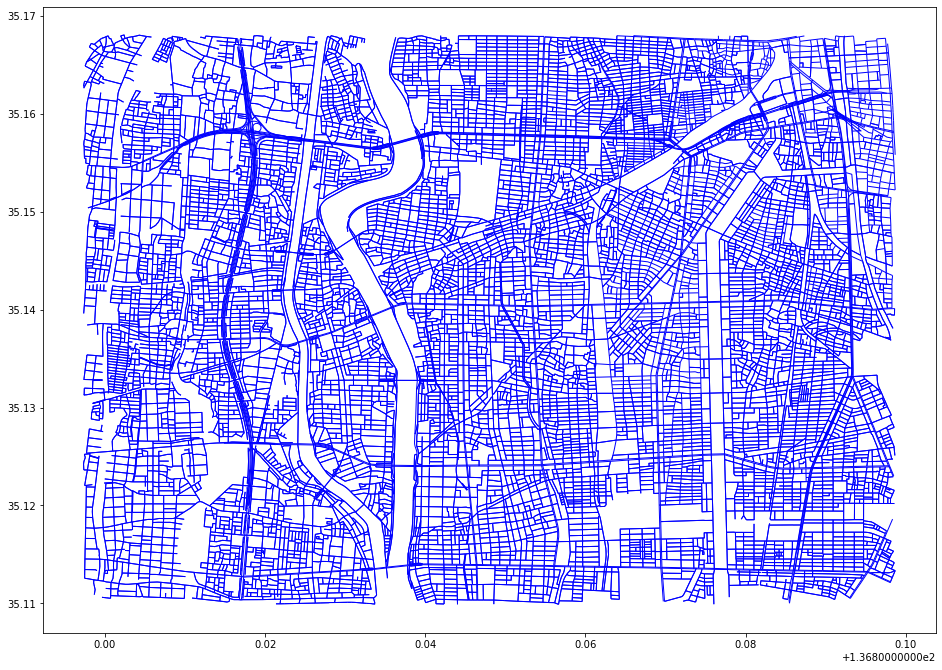

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,18))

edges_box.plot(ax=ax, linewidth=1, edgecolor='b')

In [5]:
type(edges_box)

geopandas.geodataframe.GeoDataFrame

In [6]:
edges_box.head()

osmid  \
u         v          key                                                 
265835867 1583801850 0                                       891546719   
287037206 6418759114 0                          [235402848, 940877736]   
          8687399278 0    [937718833, 940585691, 766866772, 766866773]   
287037515 2343100604 0                           [26213481, 231167042]   
          289332726  0                [833401496, 198688804, 50197517]   

                                highway  oneway   length          bridge  \
u         v          key                                                   
265835867 1583801850 0      residential   False  123.257             NaN   
287037206 6418759114 0         motorway    True  549.217  [viaduct, yes]   
          8687399278 0    motorway_link    True  717.481             yes   
287037515 2343100604 0         motorway    True  835.866         viaduct   
          289332726  0    motorway_link    True  885.370             yes   

                         lanes       ref                      name  \
u         v          key                                             
265835867 1583801850 0     NaN       NaN                       NaN   
287037206 6418759114 0       2  [E23, 5]     [東名阪自動車道, 名古屋高速5号万場線]   
          8687399278 0     NaN       NaN               名古屋第二環状自動車道   
287037515 2343100604 0       2    [5, 2]  [名古屋高速5号万場線, 名古屋高速2号東山線]   
          289332726  0       1       NaN                       NaN   

                                                                   geometry  \
u         v          key                                                      
265835867 1583801850 0    LINESTRING (136.80442 35.14114, 136.80578 35.1...   
287037206 6418759114 0    LINESTRING (136.81737 35.15822, 136.81780 35.1...   
          8687399278 0    LINESTRING (136.81737 35.15822, 136.81817 35.1...   
287037515 2343100604 0    LINESTRING (136.88421 35.16051, 136.88439 35.1...   
          289332726  0    LINESTRING (136.88421 35.16051, 136.88436 35.1...   

                         width maxspeed est_width tunnel  
u         v          key                                  
265835867 1583801850 0     NaN      NaN       NaN    NaN  
287037206 6418759114 0     NaN      NaN       NaN    NaN  
          8687399278 0     NaN      NaN       NaN    NaN  
287037515 2343100604 0       9      NaN       NaN    NaN  
          289332726  0     NaN      NaN       NaN    NaN

In [7]:
edges_box.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
earthquake=gpd.read_file('D:/Projects/Japan Path Estimation/nakagawa_probability_hazard.zip')
earthquake.head()

,CODE,T30_I45_PS,T30_I50_PS,T30_I55_PS,T30_I60_PS,T30_P03_SI,T30_P03_BV,T30_P03_SV,T30_P06_SI,T30_P06_BV,...,T50_P05_SI,T50_P05_BV,T50_P05_SV,T50_P10_SI,T50_P10_BV,T50_P10_SV,T50_P39_SI,T50_P39_BV,T50_P39_SV,geometry
0,5236563624,0.943254,0.829926,0.677785,0.304250,6.5,88.877,170.013,6.4,75.992,...,6.4,83.979,160.644,6.3,71.000,135.817,5.9,43.900,83.976,"POLYGON ((136.83594 35.11179, 136.83564 35.112..."
1,5236563642,0.944194,0.831062,0.679853,0.308073,6.5,88.877,171.044,6.4,75.992,...,6.4,83.979,161.618,6.3,71.000,136.640,6.0,43.900,84.485,"POLYGON ((136.83646 35.11250, 136.83564 35.112..."
2,5236563643,0.943960,0.830778,0.679337,0.307117,6.5,88.877,170.786,6.4,75.992,...,6.4,83.979,161.374,6.3,71.000,136.434,6.0,43.900,84.358,"POLYGON ((136.83384 35.11667, 136.83437 35.116..."
3,5236563644,0.948650,0.836751,0.689801,0.326478,6.5,88.877,176.136,6.4,75.992,...,6.5,83.979,166.430,6.3,71.000,140.708,6.0,43.900,87.001,"POLYGON ((136.83437 35.11543, 136.83437 35.116..."
4,5236563731,0.942983,0.829588,0.678929,0.306150,6.5,89.248,170.168,6.4,76.350,...,6.4,84.339,160.810,6.3,71.348,136.038,6.0,44.186,84.250,"POLYGON ((136.83750 35.11394, 136.83750 35.114..."


In [9]:
earthquake.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

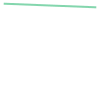

In [10]:
edges_box.iloc[0].geometry

In [11]:
point1=shapely.geometry.Point(136.83601,35.11226)
line1=edges_box.iloc[0].geometry

In [12]:
shapely.ops.nearest_points(point1,line1)

(<shapely.geometry.point.Point at 0x17cb38c09a0>,
 <shapely.geometry.point.Point at 0x17cb14c5f10>)

In [13]:
[o.wkt for o in shapely.ops.nearest_points(point1,line1)]

['POINT (136.83601 35.11226)', 'POINT (136.8057767 35.141085)']

In [14]:
line1.wkt

'LINESTRING (136.8044227 35.1411379, 136.8057767 35.141085)'

In [17]:
edges_box.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
earthquake.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
nodes_box.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
265835867,35.141138,136.804423,1,NaN,NaN,POINT (136.80442 35.14114)
287037206,35.158223,136.817371,3,NaN,NaN,POINT (136.81737 35.15822)
287037515,35.160509,136.884213,3,motorway_junction,NaN,POINT (136.88421 35.16051)
287041483,35.167953,136.892377,4,traffic_signals,NaN,POINT (136.89238 35.16795)
287041551,35.167443,136.882642,3,NaN,NaN,POINT (136.88264 35.16744)


In [ ]:
intersection = []
line = []
my_point = []

for i in earthquake.index:
    for j in edges_box.index:
        intersection.append(earthquake.loc[i, 'geometry'].centroid)
        line.append(edges_box.loc[j, 'geometry'])
        my_point.append([p.wkt for p in nearest_points(earthquake.loc[i, 'geometry'].centroid, edges_box.loc[j, 'geometry'])][1])


result = gpd.GeoDataFrame({'intersection':intersection, 'line':line, 'nearest_point':my_point})

result.geometry = result.loc[:, 'nearest_point'].apply(wkt.loads)
result.drop(columns=['nearest_point'], inplace=True)


In [ ]:
result.head()

In [ ]:
result

In [52]:
earthquake.loc[0,'geometry'].wkt

'POLYGON ((136.835940839 35.11179235500003, 136.8356359150804 35.11249999999999, 136.8364557384351 35.11249999999999, 136.835940839 35.11179235500003))'

In [48]:
list(edges_box['geometry'].tolist()[134].coords)

[(136.8448433, 35.132746), (136.8448578, 35.1317239)]

In [42]:
edges_box['geometry'].tolist()[0].wkt

'LINESTRING (136.8044227 35.1411379, 136.8057767 35.141085)'

In [40]:
nearest_points(earthquake.loc[0, 'geometry'].centroid, edges_box['geometry'].tolist()[0])[0].wkt

'POINT (136.8360108308385 35.11226411833334)'

In [41]:
nearest_points(earthquake.loc[0, 'geometry'].centroid, edges_box['geometry'].tolist()[0])[1].wkt

'POINT (136.8057767 35.141085)'

In [26]:
edges_box['geometry'].tolist()

 ...]

In [51]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

In [53]:
destination=MultiPoint(nodes_box['geometry'].tolist())
origin=earthquake.loc[0,'geometry'].centroid

In [58]:
nearest_points(origin, destination)[0].wkt

'POINT (136.8360108308385 35.11226411833334)'

In [59]:
origin.wkt

'POINT (136.8360108308385 35.11226411833334)'

In [60]:
nearest_points(origin, destination)[1].wkt

'POINT (136.8352751 35.1125664)'

In the tuple, the first item (at index 0) is the geometry of our origin point and the 
second item (at index 1) is the actual nearest geometry from the destination points.

In [61]:
nodes_box.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
265835867,35.141138,136.804423,1,NaN,NaN,POINT (136.80442 35.14114)
287037206,35.158223,136.817371,3,NaN,NaN,POINT (136.81737 35.15822)
287037515,35.160509,136.884213,3,motorway_junction,NaN,POINT (136.88421 35.16051)
287041483,35.167953,136.892377,4,traffic_signals,NaN,POINT (136.89238 35.16795)
287041551,35.167443,136.882642,3,NaN,NaN,POINT (136.88264 35.16744)


In [63]:
earthquake['centroid']=earthquake.centroid

C:\Users\avi00\AppData\Local\Temp/ipykernel_9124/835945114.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  earthquake['centroid']=earthquake.centroid


In [64]:
earthquake.head()

,CODE,T30_I45_PS,T30_I50_PS,T30_I55_PS,T30_I60_PS,T30_P03_SI,T30_P03_BV,T30_P03_SV,T30_P06_SI,T30_P06_BV,...,T50_P05_BV,T50_P05_SV,T50_P10_SI,T50_P10_BV,T50_P10_SV,T50_P39_SI,T50_P39_BV,T50_P39_SV,geometry,centroid
0,5236563624,0.943254,0.829926,0.677785,0.304250,6.5,88.877,170.013,6.4,75.992,...,83.979,160.644,6.3,71.000,135.817,5.9,43.900,83.976,"POLYGON ((136.83594 35.11179, 136.83564 35.112...",POINT (136.83601 35.11226)
1,5236563642,0.944194,0.831062,0.679853,0.308073,6.5,88.877,171.044,6.4,75.992,...,83.979,161.618,6.3,71.000,136.640,6.0,43.900,84.485,"POLYGON ((136.83646 35.11250, 136.83564 35.112...",POINT (136.83618 35.11373)
2,5236563643,0.943960,0.830778,0.679337,0.307117,6.5,88.877,170.786,6.4,75.992,...,83.979,161.374,6.3,71.000,136.434,6.0,43.900,84.358,"POLYGON ((136.83384 35.11667, 136.83437 35.116...",POINT (136.83420 35.11625)
3,5236563644,0.948650,0.836751,0.689801,0.326478,6.5,88.877,176.136,6.4,75.992,...,83.979,166.430,6.3,71.000,140.708,6.0,43.900,87.001,"POLYGON ((136.83437 35.11543, 136.83437 35.116...",POINT (136.83597 35.11564)
4,5236563731,0.942983,0.829588,0.678929,0.306150,6.5,89.248,170.168,6.4,76.350,...,84.339,160.810,6.3,71.348,136.038,6.0,44.186,84.250,"POLYGON ((136.83750 35.11394, 136.83750 35.114...",POINT (136.83766 35.11437)


In [70]:
other_points = nodes_box["geometry"].unary_union
other_points.wkt

'MULTIPOINT (136.7973506 35.1626114, 136.7973508 35.1396099, 136.7973558 35.1567626, 136.7973647 35.1312817, 136.7973657 35.1236249, 136.7973864 35.1329243, 136.7974171 35.1572792, 136.7974173 35.1567018, 136.7974174 35.156337, 136.7974252 35.1404001, 136.7974275 35.1559078, 136.7974288 35.1331983, 136.7974293 35.1319795, 136.7974351 35.1557052, 136.7974363 35.1556658, 136.7974517 35.155448, 136.7974537 35.1633189, 136.7974695 35.1125635, 136.7974721 35.1128749, 136.7974734 35.1220404, 136.797475 35.1628018, 136.7974755 35.1573999, 136.7974802 35.1134544, 136.7975019 35.1412146, 136.7975036 35.1145348, 136.797523 35.1338077, 136.797526 35.1583921, 136.7975296 35.1155681, 136.7975308 35.1648726, 136.7975369 35.1578379, 136.7975602 35.1166303, 136.7975633 35.1580231, 136.7975684 35.1420503, 136.7975766 35.1589751, 136.7975846 35.1174197, 136.7975851 35.1341964, 136.79759 35.1177121, 136.7975939 35.1179873, 136.7976048 35.1549513, 136.7976051 35.1428696, 136.7976053 35.1187814, 136.797616

In [73]:
nearest_geoms = nearest_points(earthquake.loc[0,'centroid'], other_points)
nearest_geoms

(<shapely.geometry.point.Point at 0x17cb33a1670>,
 <shapely.geometry.point.Point at 0x17cb27ac580>)

In [74]:
nearest_data = nodes_box.loc[nodes_box["geometry"] == nearest_geoms[1]]
nearest_data

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
1583796921,35.112566,136.835275,1,NaN,NaN,POINT (136.83528 35.11257)


In [79]:
nearest_data.index[0]

1583796921

In [80]:
def get_nearest_values(row, other_gdf, point_column='geometry', value_column="geometry"):
    """Find the nearest point and return the corresponding value from specified value column."""
    
    # Create an union of the other GeoDataFrame's geometries:
    other_points = other_gdf["geometry"].unary_union
    
    # Find the nearest points
    nearest_geoms = nearest_points(row[point_column], other_points)
    
    # Get corresponding values from the other df
    nearest_data = other_gdf.loc[other_gdf["geometry"] == nearest_geoms[1]]
    
    nearest_value = nearest_data.index[0]
    
    return nearest_value

In [81]:
earthquake["osmid"] = earthquake.apply(get_nearest_values, other_gdf=nodes_box, point_column="centroid", value_column="osmid", axis=1)

In [82]:
earthquake.head()

,CODE,T30_I45_PS,T30_I50_PS,T30_I55_PS,T30_I60_PS,T30_P03_SI,T30_P03_BV,T30_P03_SV,T30_P06_SI,T30_P06_BV,...,T50_P05_SV,T50_P10_SI,T50_P10_BV,T50_P10_SV,T50_P39_SI,T50_P39_BV,T50_P39_SV,geometry,centroid,osmid
0,5236563624,0.943254,0.829926,0.677785,0.304250,6.5,88.877,170.013,6.4,75.992,...,160.644,6.3,71.000,135.817,5.9,43.900,83.976,"POLYGON ((136.83594 35.11179, 136.83564 35.112...",POINT (136.83601 35.11226),1583796921
1,5236563642,0.944194,0.831062,0.679853,0.308073,6.5,88.877,171.044,6.4,75.992,...,161.618,6.3,71.000,136.640,6.0,43.900,84.485,"POLYGON ((136.83646 35.11250, 136.83564 35.112...",POINT (136.83618 35.11373),9396199086
2,5236563643,0.943960,0.830778,0.679337,0.307117,6.5,88.877,170.786,6.4,75.992,...,161.374,6.3,71.000,136.434,6.0,43.900,84.358,"POLYGON ((136.83384 35.11667, 136.83437 35.116...",POINT (136.83420 35.11625),3830339757
3,5236563644,0.948650,0.836751,0.689801,0.326478,6.5,88.877,176.136,6.4,75.992,...,166.430,6.3,71.000,140.708,6.0,43.900,87.001,"POLYGON ((136.83437 35.11543, 136.83437 35.116...",POINT (136.83597 35.11564),3830338510
4,5236563731,0.942983,0.829588,0.678929,0.306150,6.5,89.248,170.168,6.4,76.350,...,160.810,6.3,71.348,136.038,6.0,44.186,84.250,"POLYGON ((136.83750 35.11394, 136.83750 35.114...",POINT (136.83766 35.11437),1162707552
